In [41]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import random_graph
import itertools
import collections
import pandas as pd
from pandas.plotting import parallel_coordinates
from matplotlib import rc
import functools
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import scipy.sparse as sparse
rc('text', usetex=True)
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.patches import Circle, PathPatch, Wedge
from matplotlib.collections import PatchCollection
import multi_sensor_env
from solar_sensor_env import goodgraphreward
sns.set(font='serif', style='white')
import functools
import solar_sensor_env
import datetime

In [2]:
with open('tmp/cuysq_6000_preserve3b_shortlearnedseen.json') as f:
    statetracerl = json.load(f)
with open('tmp/nsyot_fullnaiveseen.json') as f:
    d = json.load(f)
    statetrace=d
with open('tmp/rqezz_lpseenperfect.json') as f:
    d = json.load(f)
    statetracelp=d
with open('tmp/cuysq_6000_preserve3b_13ddqn.json') as f:
    unseenrl = json.load(f)
with open('tmp/ibyks_lpununseenperfect.json') as f:
    d = json.load(f)
    unseenlp=d
with open('tmp/dtgtb_fullnaiveunseen.json') as f:
    d = json.load(f)
    unseengreedy=d
coords = random_graph.generate_sorted_grid_coords(16)

In [93]:
run =2
startday=0#43
periods=8
duration=30
select = [startday*periods,(startday+duration)*periods]
thedata = statetrace['data'][run][select[0]:select[1]]
thedatarl = statetracerl['data'][run][select[0]:select[1]]
thedatalp = statetracelp['data'][run][select[0]:select[1]]
#
unthedata = unseengreedy['data'][run][select[0]:select[1]]
unthedatarl = unseenrl['data'][run][select[0]:select[1]]
unthedatalp = unseenlp['data'][run][select[0]:select[1]]
from mpl_toolkits.mplot3d import Axes3D
#day = 37
rewards = {'greedy':0, 'ddq':0}
rewards = [goodgraphreward({k: v[0:2] for k,v in tslice.items()},coords)
           for tslice in thedata]
rewardsrl = [goodgraphreward({k: v[0:2] for k,v in tslice.items()},coords)
           for tslice in thedatarl]
rewardslp = [goodgraphreward({k: v[0:2] for k,v in tslice.items()},coords)
           for tslice in thedatalp]

unrewards = [goodgraphreward({k: v[0:2] for k,v in tslice.items()},coords)
           for tslice in unthedata]
unrewardsrl = [goodgraphreward({k: v[0:2] for k,v in tslice.items()},coords)
           for tslice in unthedatarl]
unrewardslp = [goodgraphreward({k: v[0:2] for k,v in tslice.items()},coords)
           for tslice in unthedatalp]

In [94]:
def get_month(solarrecord, startmonth):
    startidx = startmonth*30*48
    finishidx = (startmonth+1)*30*48
    return solarrecord[startidx:finishidx]
def getthesolar(name):
    solarrecord = solar_sensor_env.get_generated_power(name)
    monthrecord = get_month(solarrecord,8)
    return solar_sensor_env.downsample(monthrecord, factor=int(48/8))
train = getthesolar('training_12')
test =getthesolar('training_13')
start = datetime.datetime(2012, 9, 1)
step = datetime.timedelta(hours=3)
def reducer(accum, el):
    accum.append(accum[-1]+el)
    return accum
trainingmonth=functools.reduce(reducer, [step for _ in train],[start])
testingmonth = functools.reduce(reducer, [step for _ in train],[datetime.datetime(2013, 9, 1)])

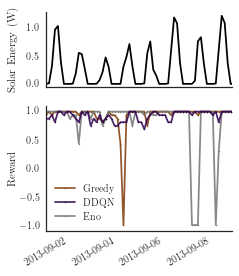

In [148]:
fig, (ax2, ax) = plt.subplots(2, sharex=True,gridspec_kw={'height_ratios': [1.5, 2.5]})
fig.set_size_inches(3.5,4)
ax.plot(testingmonth[:-1],unrewards, linestyle='-', marker='o', 
        alpha=0.85, markersize=1.5, label='Greedy',color='#7f3b08')
ax.plot(testingmonth[:-1],unrewardsrl,linestyle='-', marker='o',
        alpha=0.85, markersize=1.5, zorder=100, label='DDQN',color='#2d004b')
ax.plot(testingmonth[:-1],unrewardslp,linestyle='-', marker='o',
        alpha=0.85, markersize=1.5, label='Eno',color='#737373')
ax.set_xlim([datetime.datetime(2013, 9, 2),datetime.datetime(2013, 9, 2)+datetime.timedelta(days=7.8)]) 
ax.set_ylabel('Reward')
ax.yaxis.set_label_coords(-0.15,0.5)
ax.legend(loc='lower left')
# Beat them into submission and set them back again
ax.set_yticks([-1,-0.5,0,0.5,1])
ax.xaxis.set_tick_params(rotation=30)
ax2.set_ylabel('Solar Energy (W)')
ax2.yaxis.set_label_coords(-0.15,0.5)
#ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
#ax2.plot(testingmonth[:-1], test)
ax2.plot(testingmonth[:-1], test, color='k')
halfticks = ax.get_xticks()[::2]
ax.set_xticks(halfticks)
sns.despine()
fig.tight_layout()
fig.savefig('reward',dpi=600)


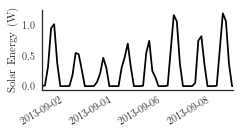

In [126]:
fig,ax = plt.subplots(1)
fig.set_size_inches(3.5,2)
ax.plot(testingmonth[:-1], test, color='k')
ax.set_xlim([datetime.datetime(2013, 9, 2),datetime.datetime(2013, 9, 2)+datetime.timedelta(days=7.8)])
halfticks = ax.get_xticks()[::2]
ax.set_xticks(halfticks)
ax.set_ylabel('Solar Energy (W)')
ax.xaxis.set_tick_params(rotation=30)
#ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
#ax2.plot(testingmonth[:-1], test)
sns.despine()
fig.tight_layout()
fig.savefig('solar',dpi=600)


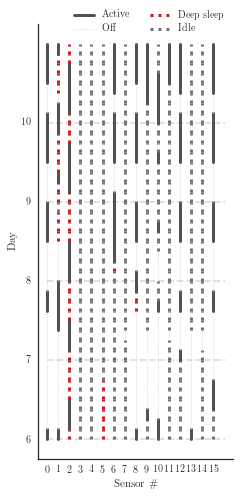

In [102]:
fig, ax = plt.subplots(1)
fig.set_size_inches(3.5,8)
"""with open('tmp/cuysq_6000_preserve3b_shortlearnedseen.json') as f:#('tmp/fogdm_7000_testingnaiveseen.json') as f:
    statetrace = json.load(f)
run=3
startday = 38
periods = 8#in three hours 8 periods make a full day
duration =4#days
"""
run =3
startday=36
periods=8
duration=5
select = [startday*periods,(startday+duration)*periods]
fulldata = statetracerl['data'][run]
data = statetracerl['data'][run]#[0:select[1]+16]
#print([i['S15'][0] for i in data[select[0]:select[1]]])
xs = list(range(len(fulldata)))#[0:select[1]+16]
flag0,flag1,flag2,flag3 = True, True,True,True
for i in range(16):
    #sensor = data['S'+str(idx)]
    ys = [i]*len(xs)
    for idxf, state in enumerate(data[select[0]:select[1]]):
        idx= select[0]+idxf                        
        sensorstate = state['S'+str(i)]
        #print(sensorstate)
        status = sensorstate[0]
        battery = sensorstate[1]
        bit = 1 if battery>0 else 0
        if status == 0 and battery>0:
            label ='Active' if flag0 else ''
            ax.plot([ys[idx], ys[idx+1]], [xs[idx],xs[idx+1]], color='#525252', linewidth=3,label=label)#battery/2)
            flag0 =False
        if status == 1 and battery>0:
            label ='Idle' if flag1 else ''
            ax.plot([ys[idx], ys[idx+1]], [xs[idx],xs[idx+1]], color='#727272', linewidth=3*bit, linestyle=':',label=label)#battery/2)
            flag1 = False
        if status == 2 and battery>0:
            label = 'Deep sleep' if flag2 else ''
            ax.plot([ys[idx], ys[idx+1]], [xs[idx],xs[idx+1]], color='#cb181d', linewidth=3*bit, linestyle=':',label=label)#battery/2)
            flag2 = False
        if battery == 0:
            label ='Off' if flag3 else ''
            ax.plot([ys[idx], ys[idx+1]], [xs[idx],xs[idx+1]], color='#d9d9d9', linewidth=1,linestyle=':',label=label)#battery/2)
            flag3=False
sns.despine()
yticks = [i for i in range(select[0], select[1]) if i%8==0]
for y in yticks:
    ax.plot([0,16],[y,y], linestyle='--', color='#525252', alpha=0.2)
ylabels = [int((i/8)%30) for i in yticks]
_ =ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
ax.set_ylabel('Day')
xticks = [int(i) for i in range(16)]
_ =ax.set_xticks(xticks)
_ = ax.set_xlabel('Sensor \#')
_=ax.legend(bbox_to_anchor=(1,1.05),ncol=2)
#ax.axvline(x=0)
#fig.savefig('temporaldetail.png',dpi=600)
#ax.set_ylim()
#['S12','S10','S9','S15','S11','S14','S7','S13']

In [13]:
len(statetrace['data'])

4